In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Training/0/Training_10118481.jpg")

In [3]:
img_array.shape #rgb of the image

(48, 48, 3)

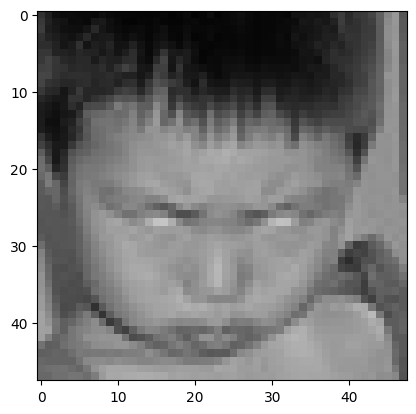

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory = "Training/" 

In [6]:
Classes = ["0", "1", "2", "3", "4"]

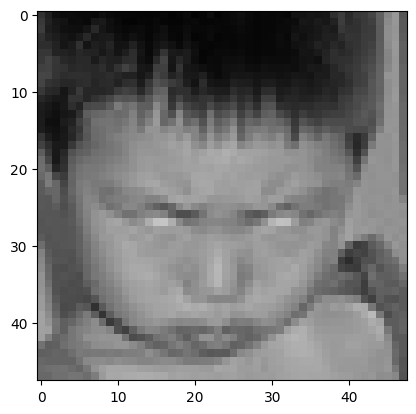

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break


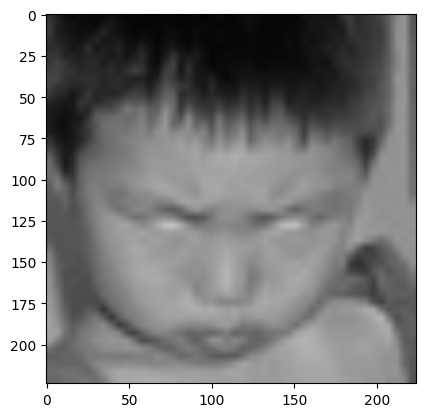

In [8]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
new_array.shape # now the shape (rgb) is 224 as we want to use transfer learning
# in order to use any deep learning classifer uses 224x224 

(224, 224, 3)

In [10]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e: 
                pass

In [11]:
training_Data = []  # Empty the list
create_training_Data()  # Load fresh data
print(f"Total images loaded: {len(training_Data)}")


Total images loaded: 17838


In [12]:
import random 
random.shuffle(training_Data)

In [13]:
X = []
y = []

for features, label in training_Data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [14]:
X.shape

(17838, 224, 224, 3)

In [15]:
Y = np.array(y)

In [16]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 

In [17]:
model = tf.keras.applications.MobileNetV2()

Transfer Learning

In [18]:
base_input = model.layers[1].input

In [19]:
base_input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [20]:
base_output = model.layers[-2].output

In [21]:
base_output

<KerasTensor shape=(None, 1280), dtype=float32, sparse=False, ragged=False, name=keras_tensor_154>

In [22]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(5, activation='softmax')(final_output) ## classification layer - (mismatched classes error found and corrected) 

In [23]:
final_output

<KerasTensor shape=(None, 5), dtype=float32, sparse=False, ragged=False, name=keras_tensor_160>

In [24]:
new_model = keras.Model(inputs = base_input, outputs= final_output)

In [25]:
for layer in new_model.layers[:-6]:  # freezing all the pretrained layers cause transfer learning
    layer.trainable = False

new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [27]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [28]:
for i, category in enumerate(Classes):
    path = os.path.join(Datadirectory, category)
    count = len(os.listdir(path))
    print(f"Class {i} ({category}): {count} images")

Class 0 (0): 2861 images
Class 1 (1): 3989 images
Class 2 (2): 4006 images
Class 3 (3): 3811 images
Class 4 (4): 3171 images


In [29]:
new_model = tf.keras.models.load_model('my_model_64p35.h5')

In [30]:
new_model.evaluate

<bound method TensorFlowTrainer.evaluate of <Functional name=functional, built=True>>

In [31]:
frame = cv2.imread("happy.jpg")

In [32]:
frame.shape

(612, 612, 3)

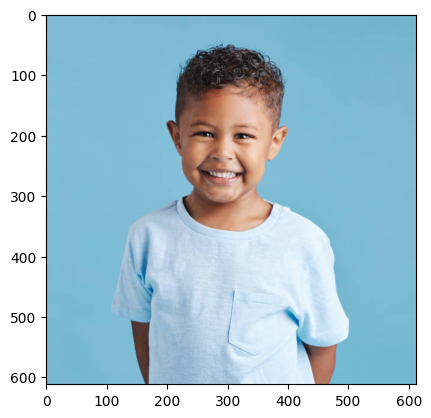

In [33]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [34]:
# Using the haarcascade_frontalface_default pretrained front face detection algorthim (only works on gray image)

In [35]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [36]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) ## converts image to gray-scale

In [37]:
gray.shape ## Only 2 numbers as it's no longer in RGB (or full color)

(612, 612)

In [38]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces: ## 4 points for the square around the face 
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    facess = faceCascade.detectMultiScale(roi_gray) ## for multiple different faces
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex + ew]

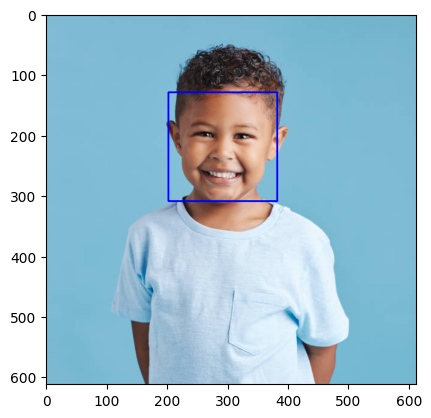

In [39]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [40]:
final_image = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
final_image = cv2.resize(final_image, (224, 224))
final_image = np.expand_dims(final_image, axis=0)
final_image = preprocess_input(final_image) 

Predictions = new_model.predict(final_image, verbose=0)

In [41]:
# Predictions = new_model.predict(final_image)

In [42]:
Predictions[0]

array([7.7074656e-06, 2.0394664e-01, 7.9554164e-01, 2.8984775e-04,
       2.1414639e-04], dtype=float32)

In [43]:
path = "haarcascade_frontalface_default.xml"

font_scale = 1.5 

font = cv2.FONT_HERSHEY_PLAIN

In [44]:

test_img = cv2.imread("Training/4/Training_377657.jpg")  
test_img_rgb = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img_resized = cv2.resize(test_img_rgb, (224, 224))
test_img_expanded = np.expand_dims(test_img_resized, axis=0)
test_img_preprocessed = preprocess_input(test_img_expanded)

pred = new_model.predict(test_img_preprocessed)
print("\nPredictions on Surprised image:")
for i, emotion in enumerate(["Angry", "Happy", "Neutral", "Sad", "Surprised"]):
    print(f"{emotion}: {pred[0][i]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

Predictions on Surprised image:
Angry: 0.00%
Happy: 0.00%
Neutral: 0.00%
Sad: 0.00%
Surprised: 100.00%


In [45]:
from collections import deque
prediction_buffer = deque(maxlen=5)  

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("Cannot Open Webcam")

while True:
    ret, frame = cap.read()
   
    if not ret:
        print("Failed to grab frame")
        break
   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, 1.3, 5)  
   
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
       
        facess = faceCascade.detectMultiScale(roi_gray)
        
        if len(facess) > 0:
            for (ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex: ex + ew]
            
            
            face_roi_rgb = cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB)
            final_image = cv2.resize(face_roi_rgb, (224, 224))
            final_image = np.expand_dims(final_image, axis=0)
            final_image = preprocess_input(final_image)
            
            Predictions = new_model.predict(final_image, verbose=0)
            prediction_buffer.append(Predictions[0])  
            avg_predictions = np.mean(prediction_buffer, axis=0) 
            emotion_index = np.argmax(avg_predictions) 
            
            prediction_buffer.append(Predictions[0])
            
            avg_predictions = np.mean(prediction_buffer, axis=0)
            emotion_index = np.argmax(avg_predictions)
           
            emotions = ["Angry", "Happy", "Neutral", "Sad", "Surprised"]
            status = emotions[emotion_index]
            
            confidence = avg_predictions[emotion_index] * 100
           
            colors = {
                "Angry": (0, 0, 255),      
                "Happy": (0, 255, 0),      
                "Neutral": (255, 255, 0),  
                "Sad": (255, 0, 0),        
                "Surprised": (0, 165, 255) 
            }
            color = colors[status]
           
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 3)
           
            x1, y1, w1, h1 = 10, 10, 250, 80
            cv2.rectangle(frame, (x1, y1), (x1 + w1, y1 + h1), (0, 0, 0), -1)
           
            cv2.putText(frame, status, (x1 + 10, y1 + 35),
                       cv2.FONT_HERSHEY_SIMPLEX, 1.2, color, 2, cv2.LINE_AA)
            cv2.putText(frame, f"{confidence:.1f}%", (x1 + 10, y1 + 65),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, cv2.LINE_AA)
    
    cv2.imshow('Emotion Detection', frame)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()